In [5]:
import pandas as pd
import numpy as np
pd.set_option('display.notebook_repr_html',True)
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Exploracion

In [6]:
# lee los datos del historial de boca
historial_boca=pd.read_csv('historial_equipos/historial_Boca%20Juniors')
historial_boca.head()

,equipo,jugados,ganados,perdidos,empatados,diferencia,gf,gc
0,River Plate,200,74,64,62,10,275,258
1,San Lorenzo,186,63,73,50,-10,252,264
2,Estudiantes (LP),185,101,42,42,59,312,194
3,Independiente,184,69,61,54,8,268,256
4,Racing Club,168,79,49,40,30,267,200


In [7]:
#con que equipos jugo mas de 50 partidos
historial_boca.jugados>50


0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
Name: jugados, Length: 76, dtype: bool

In [8]:
#con cuantos equipos jugo mas de 50 partidos
np.sum(historial_boca.jugados>50)

22

In [9]:
#porcentaje de equipos con mas de 50 partidos jugados
np.sum(historial_boca.jugados>50)/historial_boca.shape[0]

0.2894736842105263

In [10]:
#porcentaje de equipo con mas de 50 partidos jugados
np.mean(historial_boca.jugados>50)


0.2894736842105263

In [11]:
# equipos con los que jugo mas de 50 partidos y gano mas de 50 
historial_boca[(historial_boca.jugados>50) & (historial_boca.ganados>50)]

,equipo,jugados,ganados,perdidos,empatados,diferencia,gf,gc
0,River Plate,200,74,64,62,10,275,258
1,San Lorenzo,186,63,73,50,-10,252,264
2,Estudiantes (LP),185,101,42,42,59,312,194
3,Independiente,184,69,61,54,8,268,256
4,Racing Club,168,79,49,40,30,267,200
5,Velez,167,83,44,40,39,290,207
6,Newells,154,67,42,45,25,241,182
7,Rosario Central,153,68,48,37,20,237,197
8,Huracan,152,80,29,43,51,286,176
9,Gimnasia (LP),145,79,31,35,48,275,156


In [12]:
historial_boca.dtypes

equipo        object
jugados        int64
ganados        int64
perdidos       int64
empatados      int64
diferencia     int64
gf             int64
gc             int64
dtype: object

# visualizacion

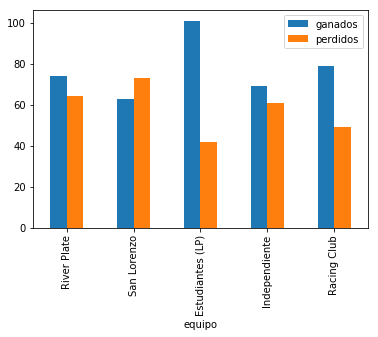

In [13]:
# grafico de barras de la cantidad de partidos ganados y perdidos por boca contra los principales equipos
principales=historial_boca.head()
principales.plot.bar(x='equipo',y=['ganados','perdidos'])

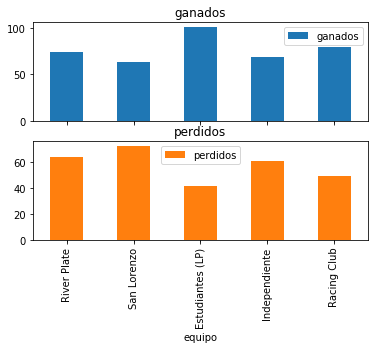

In [14]:
# el mismo grafico pero usando subplots

ax=principales.plot.bar(x='equipo',y=['ganados','perdidos'],subplots=True)

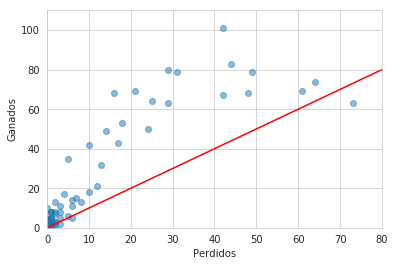

In [21]:
# 
with sns.axes_style('whitegrid'):
    x=np.linspace(0,80,80)
    plt.plot(x,x,'r')
    plt.scatter(historial_boca.perdidos,historial_boca.ganados,alpha=.5)
    plt.xlim([0,80])
    plt.ylim([0,110])
    plt.xlabel('Perdidos')
    plt.ylabel('Ganados')



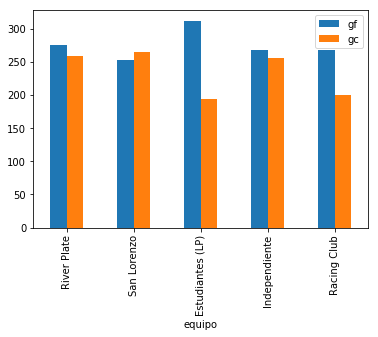

In [16]:
# grafico de los goles a favor y goles en contra
principales.plot.bar(x='equipo',y=['gf','gc'])

In [17]:
# ¿cuantos goles mete boca y cuantos le meten?

x=[historial_boca['gf'].sum(),historial_boca['gc'].sum()]
goles=pd.DataFrame({'cantidad':x},index=['gf','gc'])
goles

,cantidad
gf,5670
gc,3710


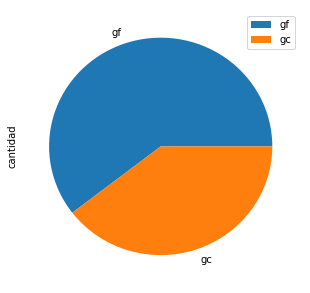

In [18]:
goles.plot.pie(y='cantidad',figsize=(5,5))

In [19]:
#cuantos partidos gano,perdio,empato

x=[historial_boca['ganados'].sum(),historial_boca['perdidos'].sum(),historial_boca['empatados'].sum()]
total=pd.DataFrame({'partidos':x},index=['ganados','perdidos','empatados'])
total

,partidos
ganados,1615
perdidos,779
empatados,872


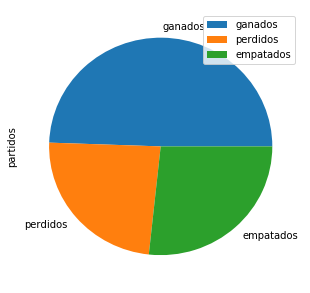

In [20]:
total.plot.pie(y='partidos',figsize=(5,5))